In [1]:
%matplotlib inline
import tables
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random

In [2]:
class DataPreparation:
    
    def write_hdf5_file(self, input_dir, output_dir, output_file_name):
        input_dir = os.path.abspath(input_dir)
        output_dir = os.path.abspath(output_dir)
        if not(os.path.exists(output_dir)):
            os.mkdir(output_dir)

        # Create hdf5 file            
        hdf5_file = tables.open_file(output_dir +  '/' + output_file_name, mode='w')
        total = len(os.listdir(input_dir))
        # Create image array in hdf5 file
        img_store = hdf5_file.create_earray(hdf5_file.root, 'images', tables.UInt8Atom(), shape=(0,3,128,128))
        i = 0
        labels = [] 
        for sub_dir in next(os.walk(input_dir))[1]:
            label = i
            i+=1
            count = 0
            print("Cat "+sub_dir+" with index "+str(i-1))
            for file_ in os.listdir(os.path.join(input_dir, sub_dir)):
                #if(random.uniform(0,1)<0.99):
                #    continue
                if file_.endswith(".gif"):
                    print("Skipping gif file")
                    continue
                img_path = os.path.join(input_dir,sub_dir, file_)
                img = cv2.imread(img_path)
                #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                print(img.shape)
                #print(img_path)
                #print(img.shape)
                img = cv2.resize(img,(128,128))
                img = np.transpose(img,(2,0,1))
                assert img.shape[0] == 3
                img_store.append(img[None])
                labels.append(label)
                count = count + 1
        # Close hdf5 file
        # Create labels array in hdf5_file for training labels\n",
        label_store = hdf5_file.create_array(hdf5_file.root, 'labels', labels)
        hdf5_file.close()

    def read_hdf5_file(self, filepath):
        print("Doing nothing")
        # To read data
        hdf5_file = tables.open_file(filepath, "r")
        # To access images array:
        images = hdf5_file.root.images
        labels = hdf5_file.root.labels
        # keep in mind the images variable is pointing to images on hard disk. So access will be slower.
        # If your memory is big enough to store all images, you can put this image array into memory by doing:
        # images = np.array(file.root.images)
        # show a sample image
        plt.imshow(images[2])
        plt.show()
        print(labels[2])
        print(1-images[2]/255)
        hdf5_file.close()
        

Cat cameras with index 0
(150, 200, 3)
(300, 300, 3)
(190, 190, 3)
(150, 200, 3)
(200, 200, 3)
(108, 150, 3)
(200, 200, 3)
(300, 300, 3)
(250, 250, 3)
(150, 146, 3)
Cat mouse with index 1
(150, 200, 3)
(199, 300, 3)
(200, 300, 3)
(150, 200, 3)
(171, 105, 3)
(200, 200, 3)
(300, 184, 3)
(191, 211, 3)
(200, 132, 3)
(208, 300, 3)
Doing nothing


TypeError: Invalid dimensions for image data

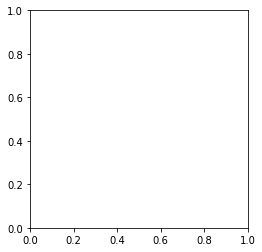

In [4]:
if __name__ == "__main__":
    dp = DataPreparation()
    dp.write_hdf5_file("test", #../datasets_new
                       "data",
                       "test_data")
    dp.read_hdf5_file("data/test_data")
    